# Evolution of Einstein's equations

# Initial data , setting length of the domain and discretization


In [1608]:
# Parameters
m = 1

1

In [1609]:
res=m;
N=2.0^m*500.0;#2.0^m*100.0;
Xf=1.0;

dx=Xf/N;
dt=round(dx*0.4,digits=10);
Nt=100.0*2^m*10
Tf=Nt*dt; #final time

println("the final time is ", Tf)

the final time is 0.8


In [1610]:
print(N)

1000.0

In [1611]:
println("dx =", dx)
println("dt =", dt)
println("dx/dt =", dx/dt)
println("epsilon <= dx/dt * (1/2)^(2*2-1) = ", dx/dt*(1/2)^(2*2-1))

println("epsilon = dx/dt * (1/2)^(2*2) = ", dx/dt*(1/2)^(2*2))

println("epsilon = dx/dt * (1/2)^(2*3) = ", dx/dt*(1/2)^(2*3))

println("epsilon = dx/dt * (1/2)^(2) = ", dx/dt*(1/2)^(2))

dx =0.001
dt =0.0004
dx/dt =2.5
epsilon <= dx/dt * (1/2)^(2*2-1) = 0.3125
epsilon = dx/dt * (1/2)^(2*2) = 0.15625
epsilon = dx/dt * (1/2)^(2*3) = 0.0390625
epsilon = dx/dt * (1/2)^(2) = 0.625


In [1612]:
# Setting RESOLUTION

global dir = "/home/rita13santos/Desktop/MSc Thesis/Git/ScalarField/DATA/res$res"

"/home/rita13santos/Desktop/MSc Thesis/Git/ScalarField/DATA/res1"

In [1613]:
println(dx)
println(dt)

0.001
0.0004


In [1614]:
epsilon=0.1##0.01#0.05; #05; #02;#0.05; #0.05; #0.05;#0.05;#0.05; #dissipation strength (-1 for backwards integration)

0.1

# Grid

In [1615]:
ori=0.0;
initX1 = nothing
initX1=range(ori, stop=Xf, step=dx);

In [1616]:
print(dx)
initX = range(round(ori-3.0*dx,digits=10), stop=Xf+3.0*dx, step=dx)

L=length(initX);
println("step size is  ", dx)

#T=range(dt,stop=Tf,step=dt)
T=range(0,stop=Tf-dt,step=dt)
println("the time step is ", dt)

0.001step size is  0.001
the time step is 0.0004


In [1617]:
radius=zeros(L)
print(L)
print(size(initX1))
print(initX1[1001])
for i in 1:L
    radius[i]=initX[i]/(1-initX[i])
end


1007(1001,)1.0

In [1618]:
include("./ScalarField.jl");

In [1619]:
using Interpolations

# Initial data of m β Ψ and Ψ,x

In [1620]:
using PyCall   


scipy = pyimport("scipy")
scipyinterpolate = pyimport("scipy.interpolate")


####

initphi=zeros(L);
initphibar=zeros(L);

#PHI,X

r0=0.7#0.3
sigma=0.3
A=0.1449
initphibar[4:L-3] = init_gaussian_der(initX1,r0,sigma,A)



#PHI FROM PSI,X
spl = scipyinterpolate.splrep(initX[4:L-3], initphibar[4:L-3],k=5)
phi0=0
SFconstraint_phi(phi0,x) = scipyinterpolate.splev(x, spl)
initphi[4:L-3], psi_ks = rungekutta4(SFconstraint_phi,phi0,initX1) 


#PHI
"initphi = init_gaussian(R,r0,sigma,A)"




"initphi = init_gaussian(R,r0,sigma,A)"

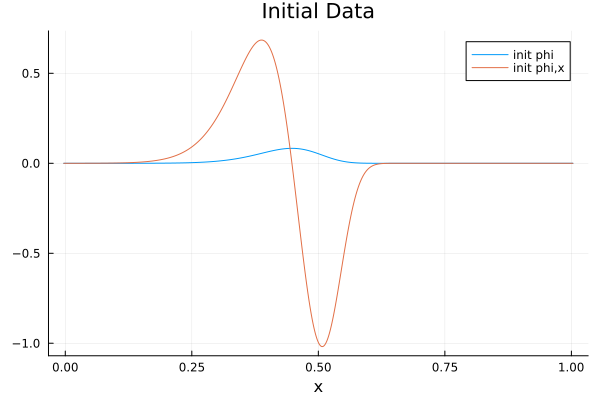

In [1621]:
using Plots #showing initial data and the initial status of the horizon finder
plot(initX, [initphi initphibar], xaxis="x",title="Initial Data", labels=["init phi" "init phi,x"])

In [1622]:
initm=zeros(L);
initbeta=zeros(L);
initpsi=zeros(L);
initpsibar=zeros(L);
state_array=[initm initbeta initpsi initpsibar initX];


#PSI
"initpsi = initphi .* initX ./ (1 .- initX)
initpsi[L-3]=0
state_array[:,3]=initpsi;
state_array=ghost(state_array);"


#PSI,X
initpsibar = initphibar .* initX ./ (1 .- initX) +  initphi ./ (1 .- initX) .^2
initpsibar[L-3]=0
state_array[:,4]=initpsibar;
state_array=ghost(state_array);

spl_derpsi = scipyinterpolate.splrep(initX[4:L-3], state_array[4:L-3,4],k=4)
derpsi_func(x) = scipyinterpolate.splev(x, spl_derpsi)
"""println(derpsi_func(0.1)[1])
println(derpsi_func(0.1))"""

#### PSI from PSI,X
spl = scipyinterpolate.splrep(initX[4:L-3], initpsibar[4:L-3],k=4)
psi0=0
SFconstraint_psi(psi0,x) = scipyinterpolate.splev(x, spl)
initpsi[4:L-3], psi_ks = rungekutta4(SFconstraint_psi,psi0,initX1)
state_array[:,3]=initpsi;
state_array=ghost(state_array);


psi_double_data = rungekutta4(SFconstraint_psi,psi0,doublegrid(initX1))[1]


#BETA
beta0=0
initbeta[4:L-3]=rk4wrapper(SFconstraint_beta,beta0,initX1,0,derpsi_func,psi_double_data)
state_array[:,2]=initbeta;
state_array=ghost(state_array);


#M
m0=0
initm[4:L-3]=rk4wrapper(SFconstraint_m,m0,initX1,0,derpsi_func,psi_double_data)
state_array[:,1]=initm;
state_array=ghost(state_array);


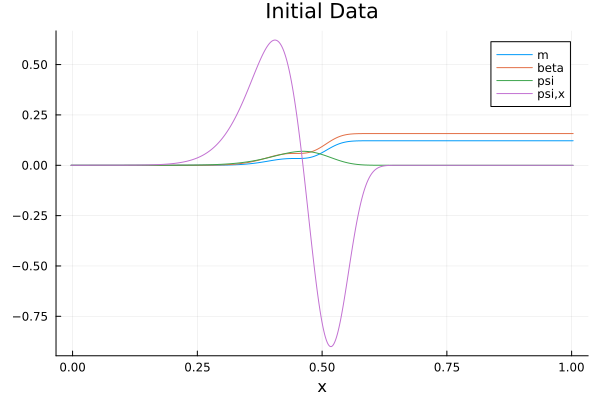

In [1623]:
using Plots #showing initial data and the initial status of the horizon finder
plot(initX, state_array[:,1:4], xaxis="x",title="Initial Data", labels=["m" "beta" "psi" "psi,x"])#, xlim=[0.4, 1])

# Defining the initial state array for the evolution m β Ψ and Ψ,x

In [1624]:
using CSV, Tables
CSV.write(dir*"/time_step0.csv", Tables.table(state_array), writeheader=false)

"/home/rita13santos/Desktop/MSc Thesis/Git/ScalarField/DATA/res1/time_step0.csv"

 ## Time evolution

fixed grid

In [1625]:
using Interpolations
using ProgressMeter
@showprogress for k in 1:30#length(T)
    
    """if isnan(state_array[3,2])
        print("boom")
        break
    end"""
    
    
    X=state_array[:,5]
    X1=X[4:L-3]
    
    #update ghost points
    state_array=boundarySF(state_array,X)
   
    #evolve psi,x
    state_array=rungekutta4molstep(SF_RHS,state_array,T,k,0,derpsi_func) #evolve psi,x
    state_array=ghost(state_array)
    
    #update ghost points
    state_array=boundarySF(state_array,X)
    
    """
    
    #calculate psi from psi,x
    psi0=0
    spl_derpsi = scipyinterpolate.splrep(X[4:L-3], state_array[4:L-3,4],k=4)
    SFconstraint_psi(psi0,x) = scipyinterpolate.splev(x, spl_derpsi)
    
    state_array[4:L-3,3],psi_ks = rungekutta4(SFconstraint_psi,psi0,X1)
    state_array=ghost(state_array);

    psi_double_data = rungekutta4(SFconstraint_psi,psi0,doublegrid(initX1))[1]   
    
    #evolve beta
    beta0=0
    state_array[4:L-3,2]=rk4wrapper(SFconstraint_beta,beta0,X1,0,derpsi_func,psi_double_data)
    state_array=ghost(state_array)
    
    #evolve m
    m0=0
    state_array[4:L-3,1]=rk4wrapper(SFconstraint_m,m0,X1,0,derpsi_func,psi_double_data)
    state_array=ghost(state_array)"""
    
    CSV.write(dir*"/time_step$k.csv", Tables.table(state_array), writeheader=false)
end

Progress: 100%|█████████████████████████████████████████| Time: 0:00:01


In [939]:
state_array[:,3]

4007-element Vector{Float64}:
  2.4713187104055985e-13
  7.897983045345819e-14
  9.826778681896131e-15
  0.0
  9.826778681896131e-15
  7.897983045345819e-14
  2.677968101659414e-13
  6.377307712074663e-13
  1.2513635516666781e-12
  2.172419298825777e-12
  3.4657781247380854e-12
  5.197489897038901e-12
  7.434788165093306e-12
  ⋮
 -1.916059143263173e-14
 -2.1925145240075952e-14
 -2.549668196975709e-14
 -3.081932069649348e-14
 -3.7890748051021297e-14
 -5.230791961179349e-14
 -7.332660954774313e-14
 -1.664196770647383e-13
 -2.9713975071523925e-13
 -1.664196770647383e-13
 -7.332660954774313e-14
 -3.1692770159876143e-13

In [ ]:
Der(state_array,1,4,initX)

In [30]:
y = state_array
X = state_array[:,5]

a=[]
for i in 1:L
    println(i," ", Der(y,i,4,X))
    a=vcat(a,Der(y,i,4,X))
end

1 -9.771500809405538e-6
2 -6.854312369258663e-6
3 -3.5899453839592484e-6
4 3.5067795195438406e-9
5 3.896480013724263e-6
6 8.087768145100503e-6
7 1.2584560269224598e-5
8 1.740277467446241e-5
9 2.255775519790623e-5
10 2.8065451784655405e-5
11 3.3942441849667946e-5
12 4.0205952331876755e-5
13 4.6873882462192536e-5
14 5.396482726651859e-5
15 6.149810182594016e-5
16 6.949376631667625e-5
17 7.797265185307188e-5
18 8.695638715752147e-5
19 9.646742608187484e-5
20 0.00010652907600554205
21 0.00011716552713619096
22 0.00012840188273964927
23 0.0001402641903263051
24 0.00015277947382207337
25 0.00016597576675272347
26 0.0001798821464711091
27 0.0001945287694576885
28 0.00020994690772543228
29 0.000226168986361168
30 0.00024322862223608388
31 0.0002611606639191236
32 0.00028000123282780726
33 0.00029978776565188
34 0.0003205590580862082
35 0.00034235530991018435
36 0.0003652181714518284
37 0.00038919079147597
38 0.00041431786653654736
39 0.0004406456918343666
40 0.00046822221362260736
41 0.0004970

438 -11.314909576301934
439 -11.767801348081479
440 -12.220254875280851
441 -12.671723967932108
442 -13.121646945643308
443 -13.569447126570754
444 -14.014533369781077
445 -14.45630067204425
446 -14.89413081997433
447 -15.327393098312566
448 -15.755445055032842
449 -16.17763332378141
450 -16.59329450404745
451 -17.001756099273283
452 -17.40233751295832
453 -17.794351102637183
454 -18.177103291411846
455 -18.549895736526842
456 -18.91202655428138
457 -19.262791600344602
458 -19.601485804320493
459 -19.927404557189217
460 -20.239845150003635
461 -20.538108261983503
462 -20.821499495894184
463 -21.089330958342007
464 -21.340922882369096
465 -21.575605289449907
466 -21.792719687733552
467 -21.991620803113424
468 -22.17167833942125
469 -22.33227876378137
470 -22.47282711289911
471 -22.592748815772527
472 -22.691491528069417
473 -22.768526973156185
474 -22.823352784501008
475 -22.855494343933362
476 -22.864506610035424
477 -22.84997593066864
478 -22.811521833480413
479 -22.74879878801207
480

849 -4.4598695638094926e-13
850 -4.547315517955797e-13
851 -4.637062599383601e-13
852 -4.729187001066857e-13
853 -4.823767963543268e-13
854 -4.920887918079837e-13
855 -5.020632637576825e-13
856 -5.123091395683354e-13
857 -5.228357134631375e-13
858 -5.336526642328994e-13
859 -5.447700739290691e-13
860 -5.56198447602516e-13
861 -5.679487341542989e-13
862 -5.800323483693174e-13
863 -5.924611942089339e-13
864 -6.052476894441208e-13
865 -6.184047917164828e-13
866 -6.319460261209158e-13
867 -6.458855144107836e-13
868 -6.602380059334879e-13
869 -6.75018910412874e-13
870 -6.902443327033357e-13
871 -7.059311096500148e-13
872 -7.22096849199828e-13
873 -7.387599719191759e-13
874 -7.559397550860877e-13
875 -7.736563795379069e-13
876 -7.919309794697576e-13
877 -8.107856953945433e-13
878 -8.302437304920081e-13
879 -8.503294105929038e-13
880 -8.710682480642339e-13
881 -8.924870098832595e-13
882 -9.14613790211736e-13
883 -9.37478087808054e-13
884 -9.611108886430071e-13
885 -9.855447541159358e-13
886 -

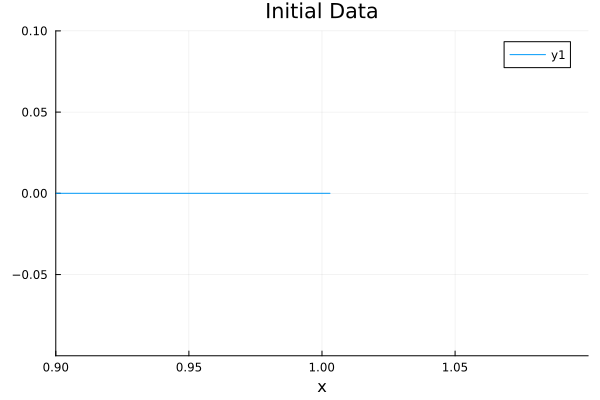

In [37]:
using Plots #showing initial data and the initial status of the horizon finder
plot(X, a, xaxis="x",title="Initial Data",xlim=[0.9, 1.1],ylim=[-0.1, 0.1])

In [352]:
state_array[:,4]

1007-element Vector{Float64}:
  1.5486091987962603e-8
  7.080050411009856e-9
  1.818179391447013e-9
  0.0
  1.925033307394743e-9
  7.892800384357168e-9
  1.8202822301613203e-8
  3.3169094212541644e-8
  5.312066070217535e-8
  7.84022114953055e-8
  1.0937469818884927e-7
  1.464159726900681e-7
  1.8992144806426074e-7
  ⋮
 -1.297499774789627e-11
 -1.6946935833986963e-11
 -2.3066662662926702e-11
 -3.321599423461445e-11
 -5.189999099158508e-11
 -9.226665065170681e-11
 -2.0759996396634033e-10
 -8.303998558653613e-10
  0.0
  4.244265929978513e-9
  1.3863064260418947e-8
  3.081706131767007e-8

In [353]:
y = state_array
X = state_array[:,5]

for i in 1:L
    println(i," ", Der(y,i,4,X))
end

Der!, i=1
1 -9.771500809405538e-6


LoadError: BoundsError: attempt to access 1007×5 Matrix{Float64} at index [0, 4]

In [29]:
y = state_array
X = state_array[:,5]

for i in 5:L-3
    println(i," ", DDer(y,i,3,X))
end

5 3.922036735066311e-6
6 8.087776969154229e-6
7 1.2584574880804493e-5
8 1.7402787848258285e-5
9 2.2557769541749108e-5
10 2.8065466377657186e-5
11 3.3942457046341455e-5
12 4.0205968026530136e-5
13 4.687389871610019e-5
14 5.396484408131265e-5
15 6.1498119225514e-5
16 6.949378431760786e-5
17 7.797267047533093e-5
18 8.69564064206236e-5
19 9.646744600628806e-5
20 0.00010652909661220143
21 0.00011716554844669718
22 0.0001284019047762197
23 0.0001402642131118107
24 0.00015277949738005093
25 0.000165975791107398
26 0.00017988217164739736
27 0.0001945287954812493
28 0.00020994693462264924
29 0.00022616901415918638
30 0.00024322865096282817
31 0.0002611606936033289
32 0.00028000126349902045
33 0.0002997877973404858
34 0.00032055909082346956
35 0.00034235534372822093
36 0.00036521820638369464
37 0.00038919082755563495
38 0.00041431790379896024
39 0.00044064573031543365
40 0.00046822225335922717
41 0.0004970971242334325
42 0.0005273217549220777
43 0.0005589493754029388
44 0.0005920350926883987
45 

690 3.429992102005512e-6
691 2.553892973356197e-6
692 1.8931402136058024e-6
693 1.3970286532955169e-6
694 1.0262229591453347e-6
695 7.503483782345606e-7
696 5.46058774496606e-7
697 3.9549494485891146e-7
698 2.850604292193869e-7
699 2.0445426790164066e-7
700 1.4591062252309694e-7
701 1.036040626457363e-7
702 7.318682092103602e-8
703 5.1430610147693304e-8
704 3.59508387899992e-8
705 2.4995404192821915e-8
706 1.728381713280371e-8
707 1.188533498090065e-8
708 8.127157106774303e-9
709 5.5256555312806376e-9
710 3.735154320483634e-9
711 2.509999763805083e-9
712 1.6766369061952362e-9
713 1.1131744958932796e-9
714 7.345199952583411e-10
715 4.816322732092515e-10
716 3.1379935325619063e-10
717 2.0312450421098884e-10
718 1.3061415831578567e-10
719 8.342019624306088e-11
720 5.290867461373049e-11
721 3.3316290430854656e-11
722 2.0822004758263904e-11
723 1.2909917001168576e-11
724 7.93504631487833e-12
725 4.829479402982515e-12
726 2.904927921720178e-12
727 1.7210249976170148e-12
728 9.98118434297167e

1004 fill(-1.72294546436755e-8)


In [1648]:
state_array[:,4]

4007-element Vector{Float64}:
 -6.510143049052199e-8
 -3.0231037195509647e-8
 -9.855754453477806e-9
  0.0
  3.3118084293502337e-9
  4.05525309899936e-9
  6.205916273373841e-9
  7.773882523859078e-9
  1.0114490197538904e-8
  1.2454855212768007e-8
  1.5215203030880247e-8
  1.8197023950857248e-8
  2.149753545676466e-8
  ⋮
 -3.7027888332063666e-11
 -1.1444949991453733e-10
 -3.3224281977537283e-10
 -5.889244257860449e-10
  3.8807381205767846e-11
  4.200002330954657e-9
  1.6762962527504585e-8
  4.4658272257260565e-8
  9.658311714823708e-8
  1.812346828284486e-7
  3.073101549259096e-7
  4.835067190686346e-7

changing grid

In [1132]:
"using Interpolations
using ProgressMeter
@showprogress for k in 1:length(T)

    #evolve grid
    X=update_grid(state_array,dx,T,k,spl_funcs)
    state_array[:,5]=X
    L=length(X)
    X1=X[4:L-3]
    
    #evolve psi,x
    state_array=rungekutta4molstep(SF_RHS,state_array,T,k,0,spl_funcs) #evolve psi,x
    state_array=ghost(state_array)
    
    X=state_array[:,5]
    X1=X[4:L-3]
    
    spl_derpsi = scipyinterpolate.splrep(X[4:L-3], state_array[4:L-3,4],k=4)
    derpsi_func(x) = scipyinterpolate.splev(x, spl_derpsi)
    spl_funcs[4] = derpsi_func
    
    #calculate psi form psi,x
    psi0=0
    SFconstraint_psi(psi0,x) = derpsi_func(x)
    state_array[4:L-3,3] = rungekutta4(SFconstraint_psi,psi0,X1)
    state_array=ghost(state_array);
    
    spl_psi = scipyinterpolate.splrep(X[4:L-3], state_array[4:L-3,3],k=4)
    psi_func(x) = scipyinterpolate.splev(x, spl_psi)
    spl_funcs[3] = psi_func
    
    #evolve beta
    beta0=0
    state_array[4:L-3,2]=rk4wrapper(SFconstraint_beta,beta0,X1,T,spl_funcs)
    state_array=ghost(state_array)
    
    spl_beta = scipyinterpolate.splrep(X[4:L-3], state_array[4:L-3,2],k=4)
    beta_func(x) = scipyinterpolate.splev(x, spl_beta)
    spl_funcs[2] = beta_func
    
    #evolve m
    m0=0
    state_array[4:L-3,1]=m_rk4wrapper(SFconstraint_m,m0,X1,T,spl_funcs)
    state_array=ghost(state_array)
    
    spl_m = scipyinterpolate.splrep(X[4:L-3], state_array[4:L-3,1],k=4)
    m_func(x) = scipyinterpolate.splev(x, spl_m)
    spl_funcs[1] = m_func
    
    CSV.write(dir*"/time_step$k.csv", Tables.table(state_array), writeheader=false)
end"

LoadError: LoadError: UndefVarError: k not defined
in expression starting at In[1132]:50

In [1023]:
print(dir)

/home/rita13santos/Desktop/MSc Thesis/Git/ScalarField/DATA/res2

## Movie of the evolution

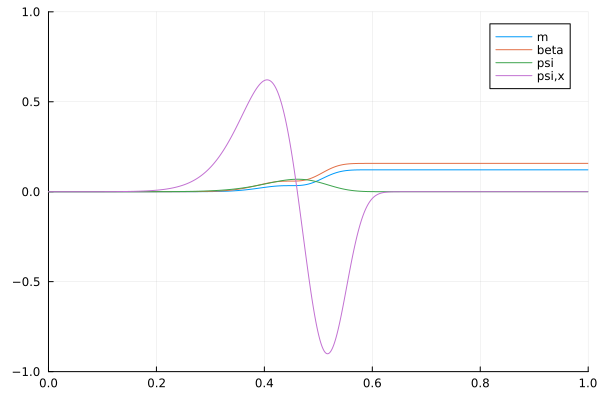

[ Info: Saved animation to /home/rita13santos/Desktop/MSc Thesis/Git/ScalarField/anim_res3.gif


Plots.AnimatedGif("/home/rita13santos/Desktop/MSc Thesis/Git/ScalarField/anim_res3.gif")
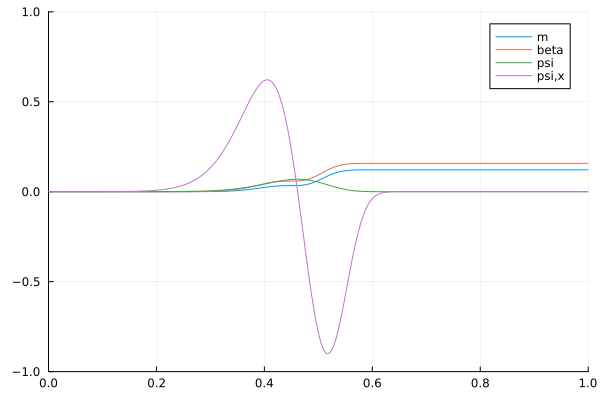

In [1003]:
using Plots, CSV, DataFrames
import GR
anim = @animate for n in 1:10#length(T)-1
    time_step=T[n+1]-T[n];
    IJulia.clear_output(true)
    functions3=DataFrame(CSV.File(dir*"/time_step$n.csv",header=false, delim=","))
    plot()
        plot1=functions3.Column1[4:L-3];
        plot2=functions3.Column2[4:L-3];
        plot3=functions3.Column3[4:L-3];
        plot4=functions3.Column4[4:L-3];
        plot5=functions3.Column5[4:L-3];
    d=round(T[n],digits=1)
    #plot!(X1, [plot1 plot2 plot3 plot4], labels=["m" "beta" "psi" "psi,x"],ylim=[-0.1,0.1], xlim=[0, 0.1]) |> display 
    plot!(initX[4:L-3], [plot1 plot2 plot3 plot4], labels=["m" "beta" "psi" "psi,x"],ylim=[-1,1], xlim=[0, 1]) |> display 
    
    end

gif(anim, "anim_res$res.gif", fps = 15)

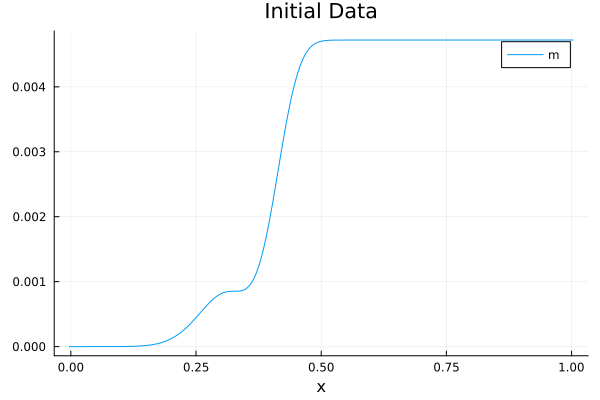

In [308]:
m0=0
initm[4:L-3]=rk4wrapper(SFconstraint_m,m0,initX1,0,spl_funcs)
state_array[:,1]=initm;
state_array=ghost(state_array);

spl_m = scipyinterpolate.splrep(initX[4:L-3], state_array[4:L-3,1],k=4)
m_func(x) = scipyinterpolate.splev(x, spl_m)
spl_funcs[1] = m_func

using Plots #showing initial data and the initial status of the horizon finder
plot(initX, ghost(initm), xaxis="x",title="Initial Data", labels=["m" "beta" "psi" "psi,x"])#, xlim=[0.4, 1])

In [40]:
#monitor_ratio = 1-v/rexp(-2beta)
monitor_ratio = zeros(L)
for i in 1:L
    monitor_ratio = 2*state_array[:,1]/initX[i]*(1-initX[i])
    if monitor_ratio[i]>0.6
        print(monitor_ratio[i])
    end
end